# Diamonds Exercise

## General housekeeping items
We will begin by importing the necessary libraries. We will use `pandas` for data manipulation, `numpy` for numerical operations, and `seaborn` (with `matplotlib`) for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the diamonds data

As in the [python basics exercise](../02_python_basics/python_basics.ipynb), we will use the `seaborn` library to load the diamonds dataset. Again, if your machine is prohibiting you from loading the dataset directly from `seaborn`, you can load it from a local file using one of the commented-out lines below.

In [2]:
diamonds = sns.load_dataset('diamonds') # Load diamonds dataset directly from seaborn - This is the original source of the data
# diamonds = pd.read_pickle('diamonds.pkl') # Import the diamonds dataset from a pickle file - preferred method from local file

diamonds.sample(10, random_state=42) # Display a random sample of 10 rows from the dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61
1608,1.00,Fair,E,SI2,55.4,62.0,3011,6.63,6.59,3.66
46398,0.51,Ideal,F,VS1,60.2,56.0,1765,5.22,5.24,3.15
45493,0.52,Ideal,D,VS2,62.0,56.0,1679,5.17,5.19,3.21
49385,0.62,Premium,E,VS2,60.0,59.0,2102,5.58,5.56,3.34
10460,1.14,Ideal,H,SI1,60.3,57.0,4789,6.79,6.85,4.11


Inspect the dataset above. Notice that it contains information about various attributes of diamonds, including carat weight, cut quality, color, clarity, price, and physical dimensions (x, y, z). You can read more about the data [here](https://ggplot2.tidyverse.org/reference/diamonds.html). Try inspecting the data in the DataSpell interface to get a better feel for it (i.e., explore the icons in the top right of the data frame output above).

## Wrangling and exploring the dataset

### Storing and filtering the data
Let's identify a subset of the dataset by filtering diamonds with a carat value of 1.5 or less and store in a new variable called `diamonds_small`. This filtered dataset will be used for subsequent analyses.

In [3]:
diamonds_small = diamonds[diamonds['carat'] < 1.5]

### Reporting summary statistics
Next, we let's report and examine summary statistics for the filtered dataset to understand the distribution of numerical variables.

In [4]:
diamonds_small.describe()

,carat,depth,table,price,x,y,z
count,47705.000000,47705.000000,47705.000000,47705.000000,47705.000000,47705.000000,47705.000000
mean,0.671046,61.741415,57.366291,2844.368557,5.471354,5.476030,3.379014
std,0.319986,1.398406,2.214324,2485.445610,0.900683,0.902703,0.573133
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.370000,61.100000,56.000000,880.000000,4.630000,4.640000,2.840000
50%,0.580000,61.800000,57.000000,1951.000000,5.380000,5.380000,3.310000
75%,1.000000,62.500000,59.000000,4258.000000,6.340000,6.340000,3.920000
max,1.490000,79.000000,79.000000,18700.000000,7.730000,31.800000,31.800000


Take a look at the summary statistics above. In particular, look at the mean, median (50%), standard deviation (std) of the price variable. What does this tell you about the distribution of diamond prices?

### Exploring the data with visualizations

#### Histogram of price
Let's plot the distribution of diamond prices using a graphic called a "histogram" (more on this later). This visualization helps understand how prices are distributed in the data.

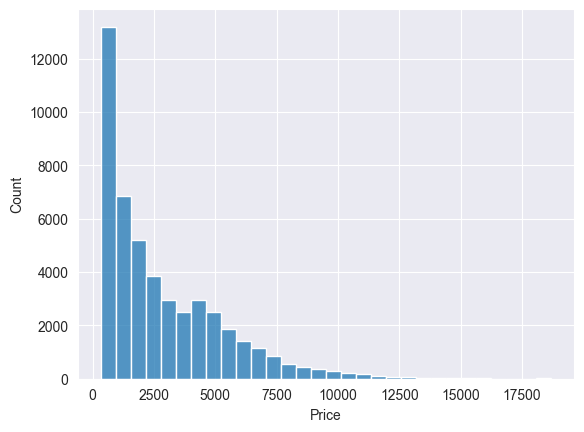

In [5]:
sns.histplot(diamonds_small['price'],
             bins=30)

plt.xlabel('Price')

plt.show()


Let’s try it again, this time using the natural logarithm of price (notice how easy this is... we just embed the `numpy` log function in the histogram function!). We will talk about the log transformation later, but, can you think of why we might want to do this? Ask AI!

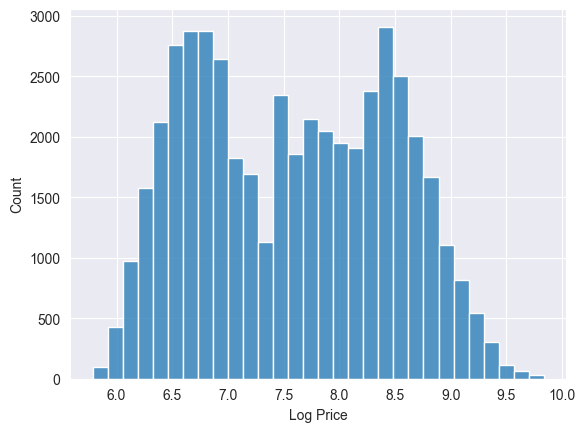

In [6]:
sns.histplot(np.log(diamonds_small['price']),
             bins=30)

plt.xlabel('Log Price')

plt.show()

#### Summarizing data by groups

Now, let's summarize the data by grouping the diamonds by clarity. For each clarity group, we calculate the average price and count the number of observations.

In [7]:
clarity_summary = (
    diamonds_small
    .groupby('clarity', observed=True) # Group by clarity, observed=True ensures we only include observed categories
    .agg(
        average_price=('price', 'mean'),
        count_obs=('price', 'count')
    ) # Within groups, calculate the mean price and count of observations
    .round(2) # Round the average price to 2 decimal places
    .reset_index() # Reset the index to make clarity a column again
)

clarity_summary

,clarity,average_price,count_obs
0,IF,2615.58,1751
1,VVS1,2315.43,3587
2,VVS2,2873.09,4861
3,VS1,2924.35,7435
4,VS2,2811.51,10916
5,SI1,2814.40,11415
6,SI2,3180.78,7230
7,I1,2515.22,510


Note how the code is formatted above. Some steps can be run in one line, but it is often easier to read and understand if we break it up into multiple lines. This is called "chaining" in `pandas`. The `groupby` function groups the data by clarity, and then we use the `agg` function to calculate the average price and count of observations within each group. Finally, we reset the index to make clarity a column again. Much easier to read!
#### Bar plot of average price by clarity
Next, lets visualize the `clarity_summary` data with a bar chart, showing the average price for each clarity level.

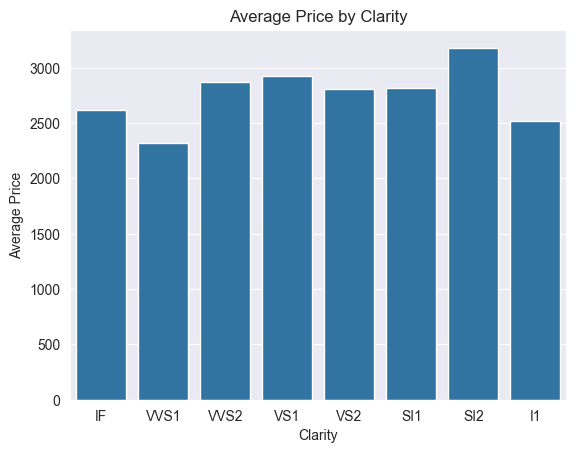

In [8]:
# Create a bar plot for the average price by clarity using seaborn
sns.barplot(data=clarity_summary,
            x='clarity',
            y='average_price'
            )

plt.xlabel('Clarity')
plt.ylabel('Average Price')
plt.title('Average Price by Clarity')

plt.show()

## Thought exercise
Looking at the graph above, notice that there doesn’t seem to be a strong or consistent relation between diamond clarity and price. That is, diamonds of higher clarity have similar or even lower prices (on average) than diamonds of lower clarity. Why do you think that is? Using one of the AI tools in DataSpell (or ChatGPT) see if you can get some guidance.

### Investigating relations between variables with scatter plots
Lets examine the relation between diamond size (carat), clarity, and price, using a scatter plot. Here, let's assign the carat to the x-axis, price to the y-axis, and use color to represent clarity. This will help us visualize how clarity affects price across different carat sizes.

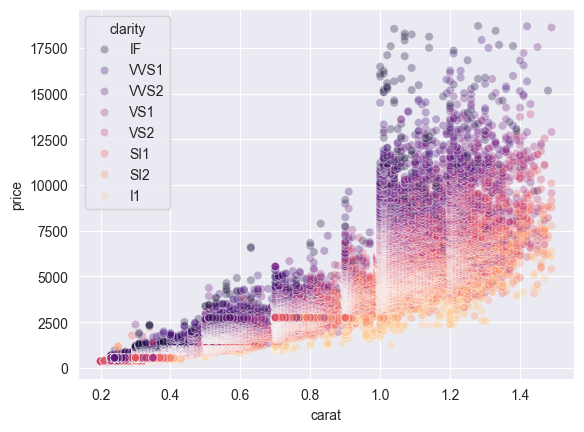

In [9]:
sns.scatterplot(x='carat',
                y='price',
                hue='clarity',
                data=diamonds_small,
                alpha=0.3,
                palette=sns.color_palette("magma",
                                          n_colors=len(diamonds_small['clarity'].unique())
                                          )
                )

plt.show()

If you are viewing the above image in 'dark mode', you may not be able to see the colors clearly. If in DataSpell, right click on the image and select 'invert image' (better?).

### More practice with data wrangling

Finally, let's isolate diamonds within a specific size range (between 1 and 1.1 carats) and summarize the data by clarity. This allows us to observe how average price and observation count differ for diamonds of similar sizes.

In [10]:
filtered_diamonds = diamonds_small[(diamonds_small['carat'] >= 1) & (diamonds_small['carat'] <= 1.1)]

clarity_summary_filtered = (
    filtered_diamonds
    .groupby('clarity', observed=True)
    .agg(
        average_price=('price', 'mean'),
        count_obs=('price', 'count')
    )
    .round(2)
    .reset_index()
)

clarity_summary_filtered

,clarity,average_price,count_obs
0,IF,11176.49,129
1,VVS1,9077.37,174
2,VVS2,8513.31,491
3,VS1,6717.30,866
4,VS2,6058.02,1578
5,SI1,4952.18,2162
6,SI2,4230.58,2017
7,I1,2928.68,151


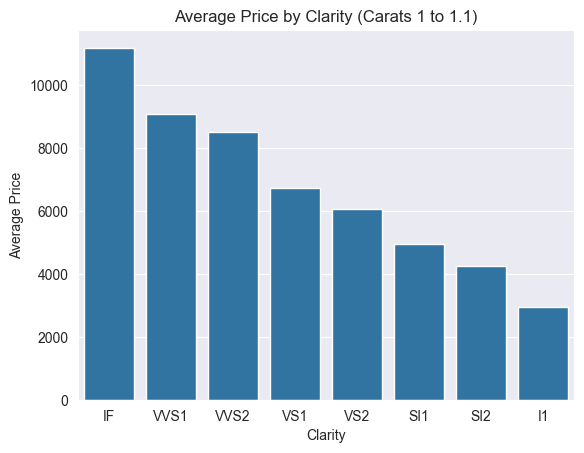

In [11]:
sns.barplot(data=clarity_summary_filtered,
            x='clarity',
            y='average_price'
            )

plt.xlabel('Clarity')
plt.ylabel('Average Price')
plt.title('Average Price by Clarity (Carats 1 to 1.1)')

plt.show()

Why does the graph above show a different relation between clarity and price than the previous bar plot?

## Data exercise
As noted above, the `seaborn` library has many built-in datasets. One of these is the [Titanic](https://www.kaggle.com/c/titanic/data) dataset, which contains information about passengers on the Titanic, including their survival status, age, class, and other attributes. Import the data using the code below.

In [12]:
titanic = sns.load_dataset('titanic')  # Load titanic dataset directly from seaborn
# titanic = pd.read_pickle('titanic.pkl')  # Alternative: Load from local pickle file

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Now use the code space below to explore the `titanic` dataset on your own. Take a look at the dataset and think about what you might want to do with it. Use the AI tools in DataSpell to guide you!

In [13]:
### Your code here